In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df1=pd.read_csv("Boston.train.csv")
df1.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [11]:
df1.shape


(400, 15)

In [18]:
df1=df1.drop(columns='ID')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     400 non-null    float64
 1   ZN       400 non-null    float64
 2   INDUS    400 non-null    float64
 3   CHAS     400 non-null    int64  
 4   NOX      400 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      400 non-null    float64
 7   DIS      400 non-null    float64
 8   RAD      400 non-null    int64  
 9   TAX      400 non-null    float64
 10  PTRATIO  400 non-null    float64
 11  B        400 non-null    float64
 12  LSTAT    400 non-null    float64
 13  MEDV     400 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 43.9 KB


In [20]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [21]:
df1.isnull().sum().sum()

0

In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543428,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,400.0,403.797500,169.656816,187.00000,277.00000,329.00000,666.000000,711.0000


<AxesSubplot:>

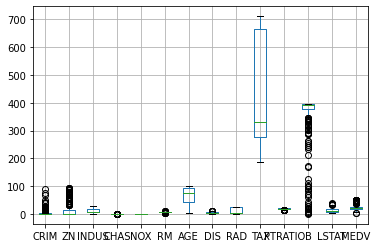

In [23]:
df1.boxplot()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

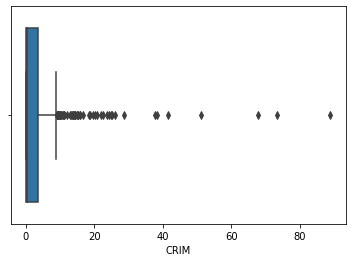

In [25]:
sns.boxplot(df1['CRIM'])

In [27]:
Q1 = df1['CRIM'].quantile(0.25)
Q3= df1['CRIM'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df1[crim] :", IQR)

25th percentile of the data is  0.07782
75th percentile of the data is  3.5434275000000004
IQR value of df1[crim] : 3.4656075000000004


In [28]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

8.741838750000001
-5.12059125


In [30]:
df1['CRIM'] = np.where(
    df1['CRIM']>max_value,
    max_value,
    np.where(
        df1['CRIM']<min_value,
        min_value,
        df1['CRIM']
    ) 
)
df1['CRIM'].describe()

count    400.000000
mean       2.169891
std        3.224890
min        0.009060
25%        0.077820
50%        0.242170
75%        3.543428
max        8.741839
Name: CRIM, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

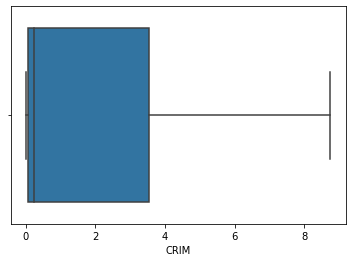

In [31]:
sns.boxplot(df1['CRIM'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

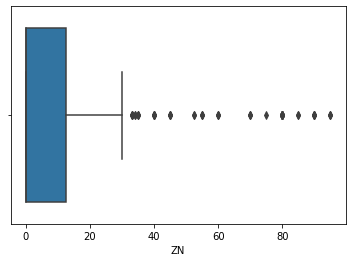

In [32]:
sns.boxplot(df1['ZN'])

In [33]:
Q1 = df1['ZN'].quantile(0.25)
Q3= df1['ZN'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df[ZN] :", IQR)

25th percentile of the data is  0.0
75th percentile of the data is  12.5
IQR value of df[ZN] : 12.5


In [34]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

31.25
-18.75


In [36]:
df1['ZN'] = np.where(
    df1['ZN']>max_value,
    max_value,
    np.where(
        df1['ZN']<min_value,
        min_value,
        df1['ZN']
    ) 
)
df1['ZN'].describe()

count    400.000000
mean       6.820000
std       11.918719
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max       31.250000
Name: ZN, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

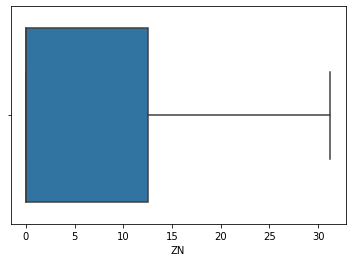

In [37]:
sns.boxplot(df1['ZN'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

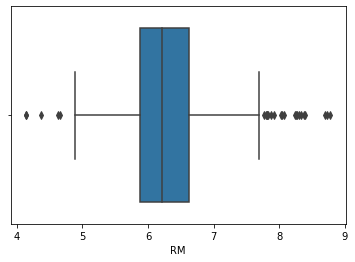

In [38]:
sns.boxplot(df1['RM'])

In [39]:
Q1 = df1['RM'].quantile(0.25)
Q3= df1['RM'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df[RM] :", IQR)

25th percentile of the data is  5.8775
75th percentile of the data is  6.6205
IQR value of df[RM] : 0.7429999999999994


In [40]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

7.734999999999999
4.763000000000002


In [41]:
df1['RM'] = np.where(
    df1['RM']>max_value,
    max_value,
    np.where(
        df1['RM']<min_value,
        min_value,
        df1['RM']
    ) 
)
df1['RM'].describe()

count    400.000000
mean       6.275225
std        0.640100
min        4.763000
25%        5.877500
50%        6.208500
75%        6.620500
max        7.735000
Name: RM, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

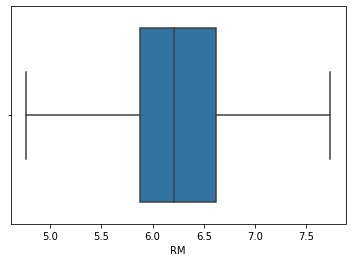

In [42]:
sns.boxplot(df1['RM'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

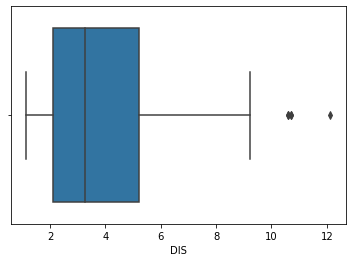

In [43]:
sns.boxplot(df1['DIS'])

In [44]:
Q1 = df1['DIS'].quantile(0.25)
Q3= df1['DIS'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df[DIS] :", IQR)

25th percentile of the data is  2.10915
75th percentile of the data is  5.2146
IQR value of df[DIS] : 3.10545


In [45]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

9.872775
-2.549025


In [46]:
df1['DIS'] = np.where(
    df1['DIS']>max_value,
    max_value,
    np.where(
        df1['DIS']<min_value,
        min_value,
        df1['DIS']
    ) 
)
df1['DIS'].describe()

count    400.000000
mean       3.806075
std        2.089468
min        1.129600
25%        2.109150
50%        3.272100
75%        5.214600
max        9.872775
Name: DIS, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

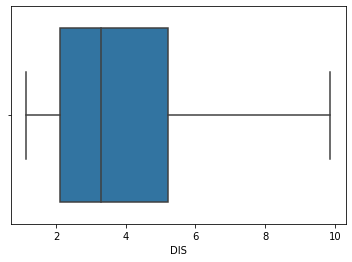

In [47]:
sns.boxplot(df1['DIS'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

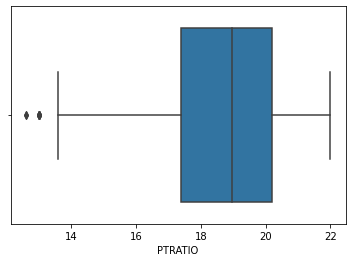

In [48]:
sns.boxplot(df1['PTRATIO'])

In [49]:
Q1 = df1['PTRATIO'].quantile(0.25)
Q3= df1['PTRATIO'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df[PTRATIO] :", IQR)

25th percentile of the data is  17.4
75th percentile of the data is  20.2
IQR value of df[PTRATIO] : 2.8000000000000007


In [50]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

24.4
13.199999999999998


In [51]:
df1['PTRATIO'] = np.where(
    df1['PTRATIO']>max_value,
    max_value,
    np.where(
        df1['PTRATIO']<min_value,
        min_value,
        df1['PTRATIO']
    ) 
)
df1['PTRATIO'].describe()

count    400.00000
mean      18.46750
std        2.12644
min       13.20000
25%       17.40000
50%       18.95000
75%       20.20000
max       22.00000
Name: PTRATIO, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

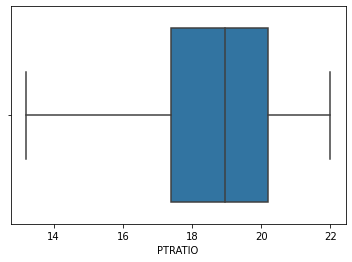

In [52]:
sns.boxplot(df1['PTRATIO'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B'>

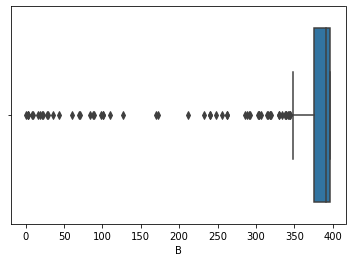

In [53]:
sns.boxplot(df1['B'])

In [54]:
Q1 = df1['B'].quantile(0.25)
Q3= df1['B'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df['B'] :", IQR)

25th percentile of the data is  376.115
75th percentile of the data is  396.28499999999997
IQR value of df['B'] : 20.16999999999996


In [55]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

426.5399999999999
345.86000000000007


In [56]:
df1['B'] = np.where(
    df1['B']>max_value,
    max_value,
    np.where(
        df1['B']<min_value,
        min_value,
        df1['B']
    ) 
)
df1['B'].describe()

count    400.00000
mean     382.41335
std       18.34296
min      345.86000
25%      376.11500
50%      391.57500
75%      396.28500
max      396.90000
Name: B, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B'>

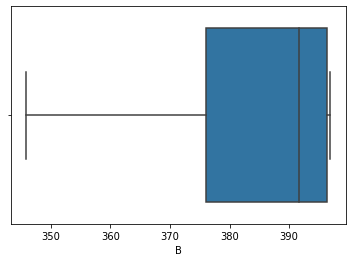

In [57]:
sns.boxplot(df1['B'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

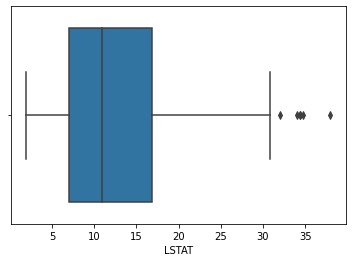

In [58]:
sns.boxplot(df1['LSTAT'])

In [59]:
Q1 = df1['LSTAT'].quantile(0.25)
Q3= df1['LSTAT'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df['LSTAT'] :", IQR)

25th percentile of the data is  6.99
75th percentile of the data is  16.91
IQR value of df['LSTAT'] : 9.92


In [60]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

31.79
-7.889999999999999


In [61]:
df1['LSTAT'] = np.where(
    df1['LSTAT']>max_value,
    max_value,
    np.where(
        df1['LSTAT']<min_value,
        min_value,
        df1['LSTAT']
    ) 
)
df1['LSTAT'].describe()

count    400.00000
mean      12.62655
std        7.08280
min        1.92000
25%        6.99000
50%       10.87500
75%       16.91000
max       31.79000
Name: LSTAT, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

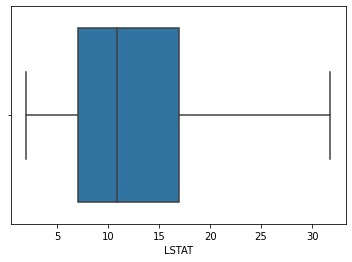

In [63]:
sns.boxplot(df1['LSTAT'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

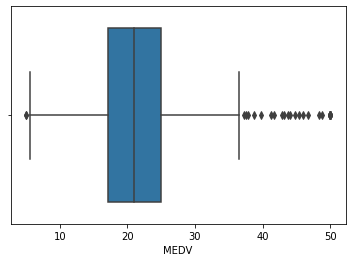

In [64]:
sns.boxplot(df1['MEDV'])

In [65]:
Q1 = df1['MEDV'].quantile(0.25)
Q3= df1['MEDV'].quantile(0.75)
print("25th percentile of the data is ", Q1)
print("75th percentile of the data is ",Q3)
IQR= Q3 - Q1
print("IQR value of df['MEDV'] :", IQR)

25th percentile of the data is  17.1
75th percentile of the data is  25.0
IQR value of df['MEDV'] : 7.899999999999999


In [66]:
max_value = Q3 + 1.5 * (IQR)
min_value = Q1 - 1.5 * (IQR)
print(max_value)
print(min_value)

36.849999999999994
5.2500000000000036


In [67]:
df1['MEDV'] = np.where(
    df1['MEDV']>max_value,
    max_value,
    np.where(
        df1['MEDV']<min_value,
        min_value,
        df1['MEDV']
    ) 
)
df1['MEDV'].describe()

count    400.000000
mean      21.796000
std        7.560084
min        5.250000
25%       17.100000
50%       21.000000
75%       25.000000
max       36.850000
Name: MEDV, dtype: float64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

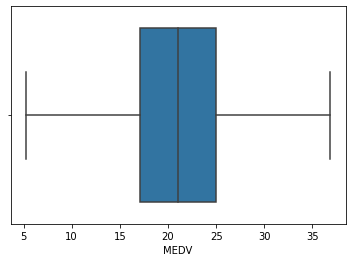

In [68]:
sns.boxplot(df1['MEDV'])

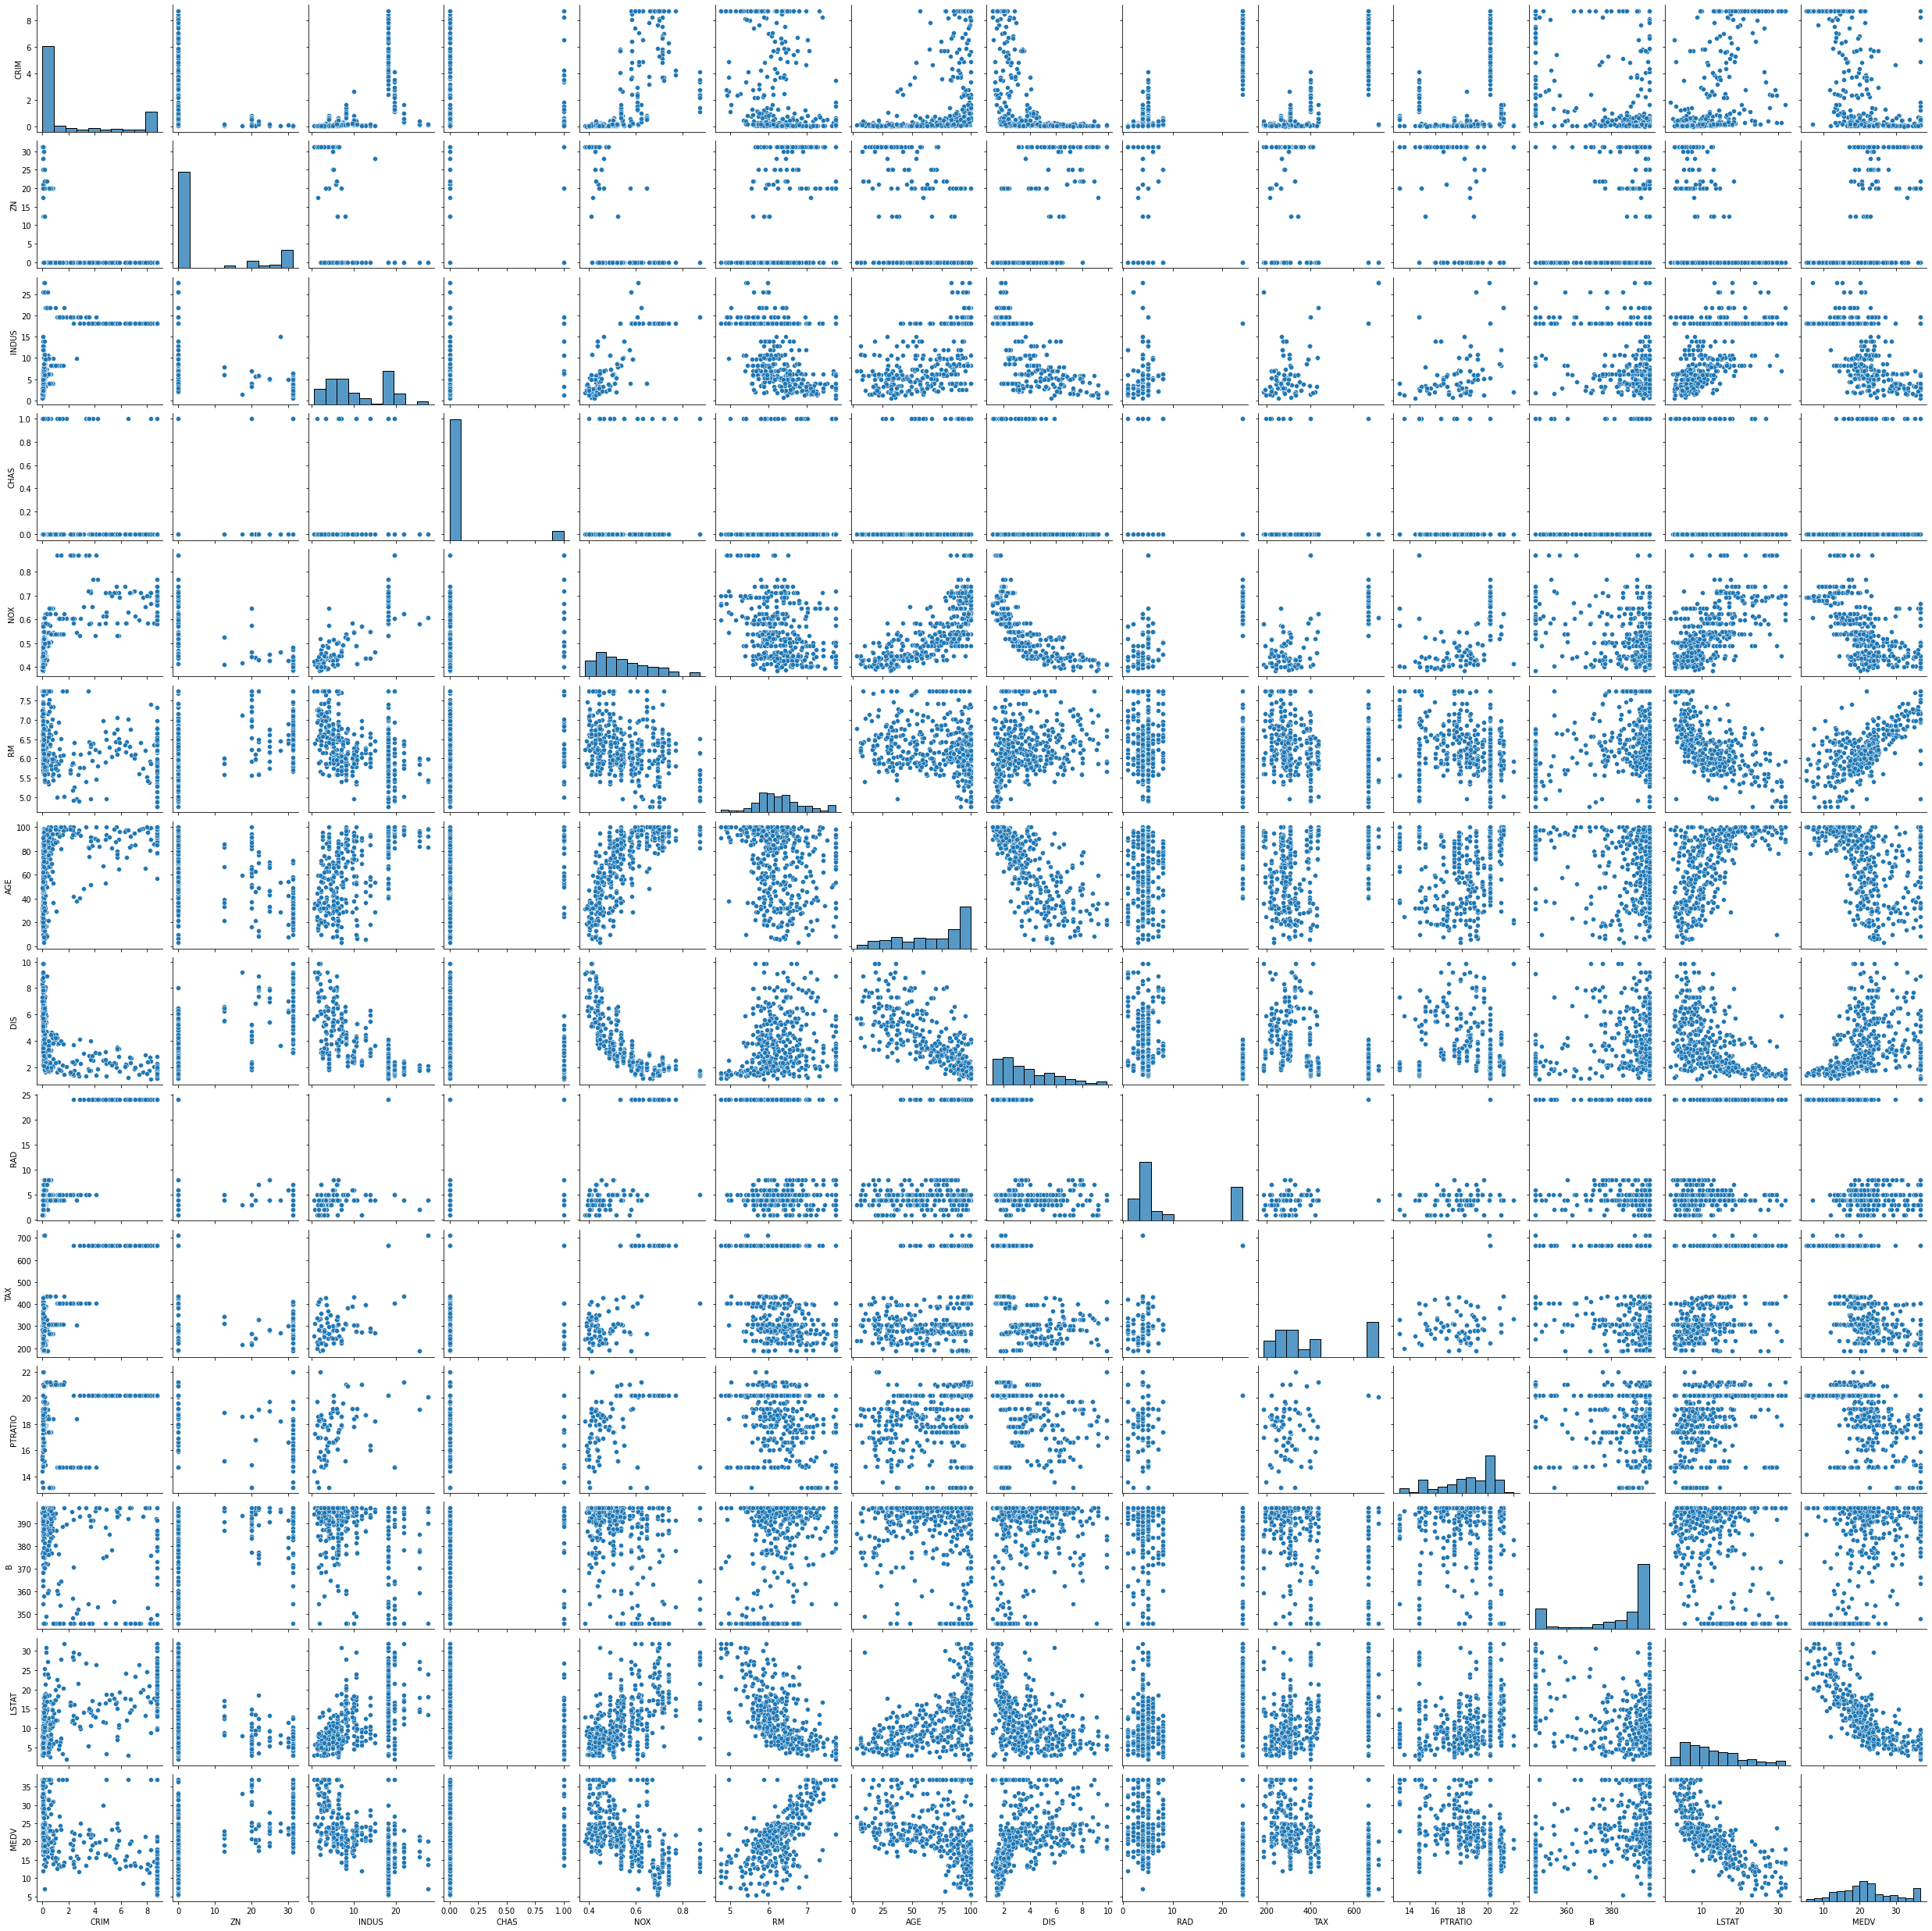

In [69]:
sns.pairplot(df1)

In [70]:
df1.corr()  # 0.2 - 1 --positive corelationship and -0.2 - 1 -- negative corelationship.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.365702,0.647743,-0.034955,0.680447,-0.264801,0.532838,-0.559521,0.930327,0.876931,0.411106,-0.382832,0.617987,-0.556479
ZN,-0.365702,1.000000,-0.573880,-0.035660,-0.524325,0.341161,-0.561996,0.658279,-0.333053,-0.369268,-0.416514,0.209898,-0.442616,0.413410
INDUS,0.647743,-0.573880,1.000000,0.075305,0.759132,-0.415759,0.631742,-0.701012,0.608088,0.731619,0.369574,-0.370133,0.628599,-0.578952
CHAS,-0.034955,-0.035660,0.075305,1.000000,0.084020,0.079375,0.083314,-0.102321,-0.023792,-0.045183,-0.140076,-0.017065,-0.054637,0.151579
NOX,0.680447,-0.524325,0.759132,0.084020,1.000000,-0.308179,0.736349,-0.776707,0.602960,0.657875,0.156415,-0.392972,0.627601,-0.517141
RM,-0.264801,0.341161,-0.415759,0.079375,-0.308179,1.000000,-0.218394,0.194143,-0.193117,-0.282784,-0.330498,0.190211,-0.646046,0.714046
AGE,0.532838,-0.561996,0.631742,0.083314,0.736349,-0.218394,1.000000,-0.757048,0.457339,0.499478,0.237431,-0.273683,0.597887,-0.434162
DIS,-0.559521,0.658279,-0.701012,-0.102321,-0.776707,0.194143,-0.757048,1.000000,-0.498485,-0.527074,-0.192320,0.271764,-0.509523,0.317032
RAD,0.930327,-0.333053,0.608088,-0.023792,0.602960,-0.193117,0.457339,-0.498485,1.000000,0.911103,0.461059,-0.333401,0.504557,-0.463328
TAX,0.876931,-0.369268,0.731619,-0.045183,0.657875,-0.282784,0.499478,-0.527074,0.911103,1.000000,0.452812,-0.375669,0.553996,-0.557146


In [71]:
df2=pd.read_csv("Boston.test.csv")
df2.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [72]:
df2= df2.drop(columns='ID')
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [74]:
X_train = df1.drop(["MEDV"], axis=1)
y_train = df1["MEDV"]
X_test = df2.iloc[:,0:13]

In [75]:
#from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = regressor.predict(X_test)
y_pred

array([ 23.86541846,  24.85144907,  11.59432376,  20.02180212,
        21.20313027,  22.54444046,  18.38620451,  22.25361468,
        32.17870562,  14.35302554,  25.3468265 ,  20.60328235,
        20.91173698,  14.75142583,  19.62473325,  26.77280728,
        17.66291342,  24.89835581,  19.78337631,  20.95404278,
        23.57205565,  32.80564296,  23.91722598,   6.74781969,
        15.36519968,   5.48253976,  14.9769471 ,  20.76214136,
        23.6814127 ,  16.67563299,  34.7600258 ,  18.2872754 ,
        18.41638963,  19.53851926,  25.47161728,  21.24541945,
        29.90907855,  29.25258715,  36.27180801,  25.86175202,
        14.75380659,  27.63717359,  24.22481461,  14.49879762,
        19.94069502,  25.56785353,  13.35632893,  23.67574489,
        15.22482487,  14.05046363,  20.37129336,  32.14383545,
        23.21500883, -22.73277157,  13.89522301,  16.3719799 ,
        20.87078388,  12.6233107 ,   3.25094946,  18.3323982 ,
        19.799098  ,  19.57573208,  31.56470297,  24.43

In [78]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Ridge(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X_train, y_train, cv=5, scoring = "r2" , return_train_score=True)
  print("Alpha : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Alpha :  0.001 0.7685776398825908 0.7969677880711384
Alpha :  0.002 0.7687234344034988 0.7969517094282355
Alpha :  0.003 0.7688534978515656 0.7969262916857148
Alpha :  0.005 0.7690719926621635 0.796851245887712
Alpha :  0.01 0.7694261955019756 0.796556653418248
Alpha :  0.02 0.769609318404909 0.7957032803142242
Alpha :  0.03 0.7694082965948358 0.7946925128226081
Alpha :  0.04 0.769003832731722 0.7936250954294302
Alpha :  0.1 0.7650397643230702 0.7871743335033071
Alpha :  0.2 0.7566495664130111 0.7768291275373029
Alpha :  0.5 0.728241269709492 0.7467025752715889
Alpha :  1 0.682078002961026 0.7004488826138033


The test score  for ridge regression is 0.76

The train score for  ridge regression is 0.79

In [79]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Lasso, Ridge
for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  regressor = Lasso(normalize=True,alpha = alpha)
  cv_results = cross_validate(regressor, X_train, y_train, cv=5, scoring = "r2" , return_train_score=True)
  print("Beta : ", alpha, cv_results['test_score'].mean(), cv_results['train_score'].mean())

Beta :  0.001 0.7692381985004063 0.7966173255449118
Beta :  0.002 0.7690695792020504 0.7955516197312067
Beta :  0.003 0.7681091905505161 0.7937727059126944
Beta :  0.005 0.7634212391634427 0.7881751116904907
Beta :  0.01 0.7561088246892101 0.7773964491596159
Beta :  0.02 0.7378755864247322 0.758276244766252
Beta :  0.03 0.7275285985737845 0.7459140238663199
Beta :  0.04 0.7204885984679936 0.7369533677353728
Beta :  0.1 0.6359856446748375 0.6534284768203034
Beta :  0.2 0.40096646752894055 0.42054240558140527
Beta :  0.5 -0.02472103503154708 0.0
Beta :  1 -0.02472103503154708 0.0


The test score for lasso regression is 0.76

The train score for lasso regression is 0.79